In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
import itertools

In [2]:
Data = pd.read_excel('Sample - Superstore.xls',encoding="ISO-8859-1")
Data.shape

(9994, 21)

In [3]:
Data_o = Data.query('Category=="Office Supplies"')
print(Data_o.shape)

(6026, 21)


In [4]:
Data_o1 = Data_o.groupby('Order Date')['Sales'].sum().reset_index()
Data_o1.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


In [5]:
Data_o2 = Data_o1.set_index('Order Date')
y_o = Data_o2['Sales'].resample('MS').mean()
y_o_df = pd.DataFrame(y_o).reset_index()
y_o_df.head()

,Order Date,Sales
0,2014-01-01,285.357647
1,2014-02-01,63.042588
2,2014-03-01,391.176318
3,2014-04-01,464.794750
4,2014-05-01,324.346545


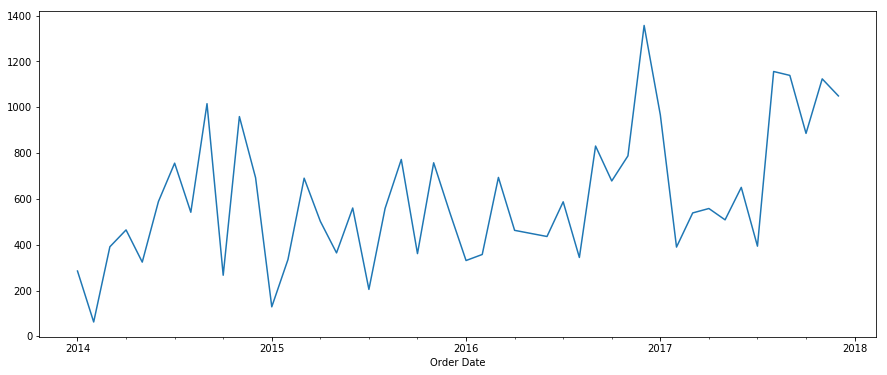

In [6]:
y_o.plot(figsize=(15, 6))
plt.show()

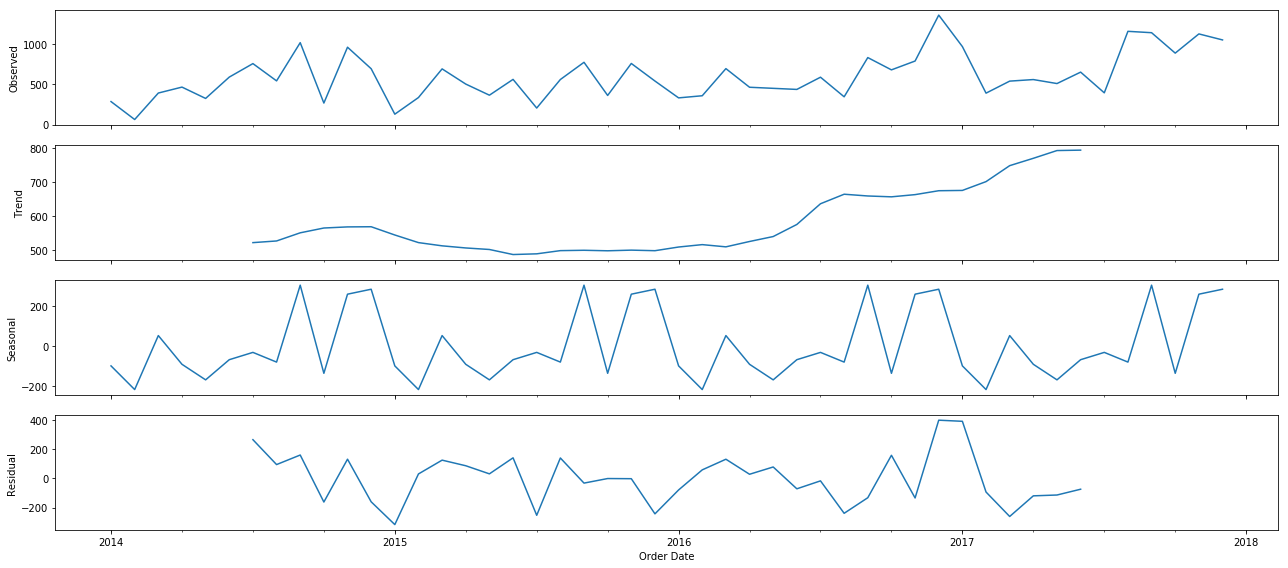

In [7]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y_o, model='additive')
fig = decomposition.plot()
plt.show()

In [8]:
# unstable sales + seasonality

In [9]:
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_o, order=param, 
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            result = mod.fit()
            print('ARIMA{}x{}12-AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12-AIC:747.1990404227043
ARIMA(0, 0, 0)x(0, 0, 1, 12)12-AIC:1590.5143507209568
ARIMA(0, 0, 0)x(0, 1, 0, 12)12-AIC:500.73353987920365
ARIMA(0, 0, 0)x(1, 0, 0, 12)12-AIC:516.0876543936834
ARIMA(0, 0, 0)x(1, 0, 1, 12)12-AIC:1446.7769748485907
ARIMA(0, 0, 0)x(1, 1, 0, 12)12-AIC:347.44488563489716
ARIMA(0, 0, 1)x(0, 0, 0, 12)12-AIC:702.6891395292478


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12-AIC:2632.582387272324
ARIMA(0, 0, 1)x(0, 1, 0, 12)12-AIC:487.76014158147217
ARIMA(0, 0, 1)x(1, 0, 0, 12)12-AIC:517.4952646587793


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12-AIC:2683.646515231705
ARIMA(0, 0, 1)x(1, 1, 0, 12)12-AIC:345.6922094460104
ARIMA(0, 1, 0)x(0, 0, 0, 12)12-AIC:666.4572045007284


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12-AIC:1429.7508747904192
ARIMA(0, 1, 0)x(0, 1, 0, 12)12-AIC:503.0840747512458
ARIMA(0, 1, 0)x(1, 0, 0, 12)12-AIC:500.0109385290892
ARIMA(0, 1, 0)x(1, 0, 1, 12)12-AIC:1392.844187293692
ARIMA(0, 1, 0)x(1, 1, 0, 12)12-AIC:335.7148959418817
ARIMA(0, 1, 1)x(0, 0, 0, 12)12-AIC:637.3530008828161
ARIMA(0, 1, 1)x(0, 0, 1, 12)12-AIC:3205.950623249092
ARIMA(0, 1, 1)x(0, 1, 0, 12)12-AIC:473.71539674554106
ARIMA(0, 1, 1)x(1, 0, 0, 12)12-AIC:489.9419970027631
ARIMA(0, 1, 1)x(1, 0, 1, 12)12-AIC:2828.516386817463
ARIMA(0, 1, 1)x(1, 1, 0, 12)12-AIC:330.7061513093236
ARIMA(1, 0, 0)x(0, 0, 0, 12)12-AIC:680.4032716562346


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12-AIC:1152.590923127492
ARIMA(1, 0, 0)x(0, 1, 0, 12)12-AIC:501.7031226672368
ARIMA(1, 0, 0)x(1, 0, 0, 12)12-AIC:500.2190534421444


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12-AIC:1258.6163536806828
ARIMA(1, 0, 0)x(1, 1, 0, 12)12-AIC:331.0719973254842
ARIMA(1, 0, 1)x(0, 0, 0, 12)12-AIC:651.1768264308375
ARIMA(1, 0, 1)x(0, 0, 1, 12)12-AIC:2758.107712180239
ARIMA(1, 0, 1)x(0, 1, 0, 12)12-AIC:488.4314196132821
ARIMA(1, 0, 1)x(1, 0, 0, 12)12-AIC:489.25464004418706
ARIMA(1, 0, 1)x(1, 0, 1, 12)12-AIC:3956.9522894775746
ARIMA(1, 0, 1)x(1, 1, 0, 12)12-AIC:331.7136802273553
ARIMA(1, 1, 0)x(0, 0, 0, 12)12-AIC:658.0713305703066


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12-AIC:1288.3473194408534
ARIMA(1, 1, 0)x(0, 1, 0, 12)12-AIC:494.90767973739406
ARIMA(1, 1, 0)x(1, 0, 0, 12)12-AIC:482.8083753024966


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12-AIC:nan
ARIMA(1, 1, 0)x(1, 1, 0, 12)12-AIC:321.23254698840503
ARIMA(1, 1, 1)x(0, 0, 0, 12)12-AIC:638.796240117383
ARIMA(1, 1, 1)x(0, 0, 1, 12)12-AIC:3608.164262434631
ARIMA(1, 1, 1)x(0, 1, 0, 12)12-AIC:475.71388519565284
ARIMA(1, 1, 1)x(1, 0, 0, 12)12-AIC:478.69873017433883
ARIMA(1, 1, 1)x(1, 0, 1, 12)12-AIC:2575.421213885362
ARIMA(1, 1, 1)x(1, 1, 0, 12)12-AIC:318.206647908437


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [10]:
mod = sm.tsa.statespace.SARIMAX(y_o, 
                                order=(1,1,1),
                                seasonal_order=(1,1,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
result = mod.fit()
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -155.103
Date:                            Tue, 05 Nov 2019   AIC                            318.207
Time:                                    21:30:44   BIC                            322.571
Sample:                                01-01-2014   HQIC                           319.235
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2479      0.328      0.755      0.450      -0.395       0.891
ma.L1         -0.9389      0.462   

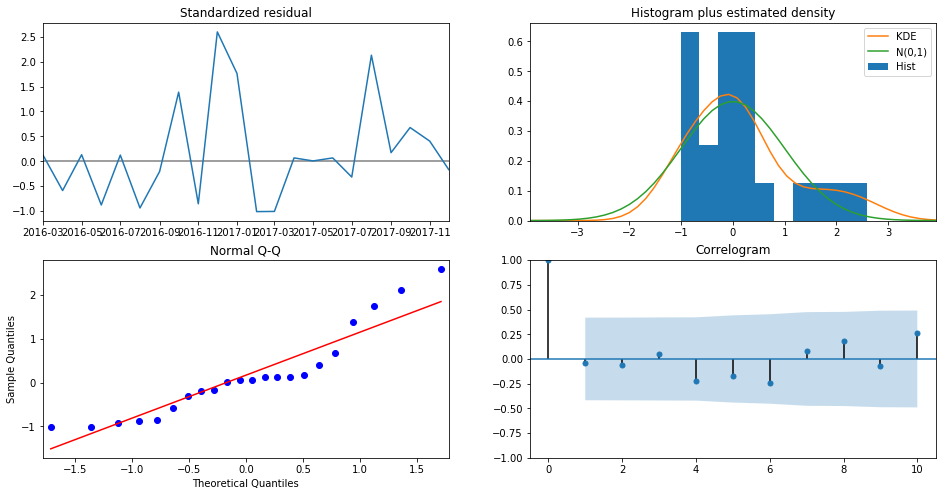

In [11]:
result.plot_diagnostics(figsize=(16,8))
plt.show()

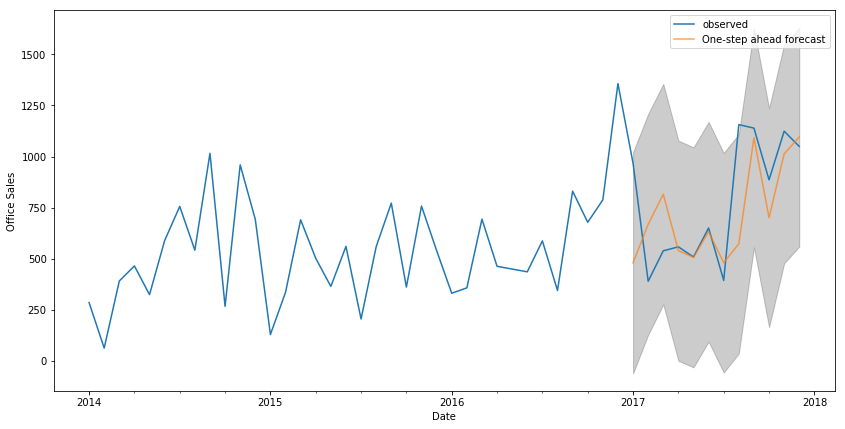

In [12]:
pred = result.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci = pred.conf_int()
ax = y_o['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast',alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Office Sales')
plt.legend()
plt.show()

In [15]:
pred_mean_df = pd.DataFrame(pred.predicted_mean).reset_index()
pred_mean_df.columns = ['Order Date','Predicted Mean']
pred_mean_df

,Order Date,Predicted Mean
0,2017-01-01,480.115008
1,2017-02-01,668.353807
2,2017-03-01,815.909034
3,2017-04-01,539.611895
4,2017-05-01,506.866571
5,2017-06-01,631.970730
6,2017-07-01,480.557416
7,2017-08-01,573.292531
8,2017-09-01,1091.811938
9,2017-10-01,700.877116


In [16]:
y_forecasted = pred.predicted_mean
y_truth = y_o['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print(mse, np.sqrt(mse))

65844.60020082074 256.60202688369543


In [20]:
y_truth_df = pd.DataFrame(y_truth).reset_index()
y_truth_df.columns = ['Order Date','Sales']
y_truth_df

,Order Date,Sales
0,2017-01-01,967.013136
1,2017-02-01,389.882737
2,2017-03-01,538.899481
3,2017-04-01,558.229296
4,2017-05-01,508.776444
5,2017-06-01,650.463038
6,2017-07-01,393.902615
7,2017-08-01,1156.148154
8,2017-09-01,1139.137250
9,2017-10-01,886.045846


In [21]:
pred_ci_df = pd.DataFrame(pred_ci).reset_index()
pred_ci_df.columns = ['Order Date','lower Sales','upper Sales']
pred_ci_df

,Order Date,lower Sales,upper Sales
0,2017-01-01,-61.399596,1021.629611
1,2017-02-01,127.920061,1208.787553
2,2017-03-01,276.381032,1355.437035
3,2017-04-01,0.848274,1078.375516
4,2017-05-01,-31.248119,1044.981262
5,2017-06-01,94.409750,1169.531711
6,2017-07-01,-56.529065,1017.643896
7,2017-08-01,36.614177,1109.970886
8,2017-09-01,555.485735,1628.138141
9,2017-10-01,164.855599,1236.898632


In [22]:
pred_ci_df = pd.DataFrame(pred_ci)
result_df = pred_ci_df.merge(y_truth_df,how='left',on=['Order Date'])
result_df = result_df.merge(pred_mean_df,how='left',on=['Order Date'])
result_df
# Compare Sales with lag(1) Predicted Mean

,Order Date,lower Sales,upper Sales,Sales,Predicted Mean
0,2017-01-01,-61.399596,1021.629611,967.013136,480.115008
1,2017-02-01,127.920061,1208.787553,389.882737,668.353807
2,2017-03-01,276.381032,1355.437035,538.899481,815.909034
3,2017-04-01,0.848274,1078.375516,558.229296,539.611895
4,2017-05-01,-31.248119,1044.981262,508.776444,506.866571
5,2017-06-01,94.409750,1169.531711,650.463038,631.970730
6,2017-07-01,-56.529065,1017.643896,393.902615,480.557416
7,2017-08-01,36.614177,1109.970886,1156.148154,573.292531
8,2017-09-01,555.485735,1628.138141,1139.137250,1091.811938
9,2017-10-01,164.855599,1236.898632,886.045846,700.877116


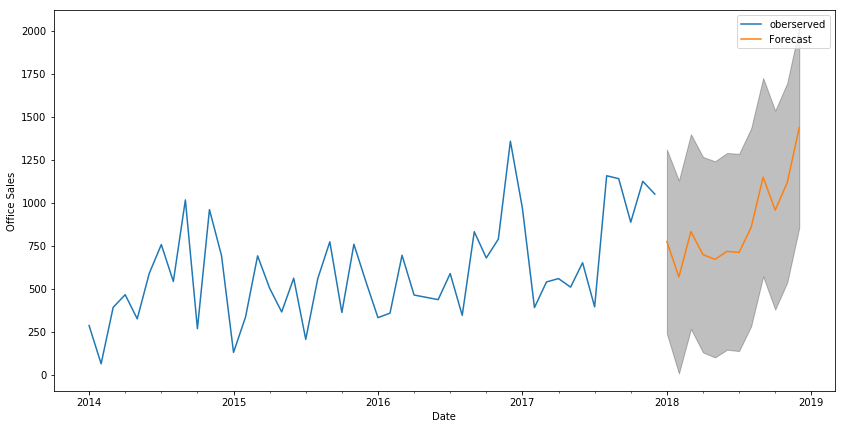

In [26]:
pred_uc = result.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax=y_o.plot(label='oberserved',figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],
                color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Office Sales')
plt.legend()
plt.show()

In [27]:
# model captured seasonality
# increase in CI = less confidence 

In [28]:
print(pred_uc.predicted_mean)

2018-01-01     773.681784
2018-02-01     567.545603
2018-03-01     831.634143
2018-04-01     697.463791
2018-05-01     670.114784
2018-06-01     716.646471
2018-07-01     710.375723
2018-08-01     855.974012
2018-09-01    1147.713781
2018-10-01     956.373152
2018-11-01    1115.563485
2018-12-01    1435.922696
Freq: MS, dtype: float64
